In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/potato_disease_image_dataset/potato_images.zip" .

In [ ]:
!unzip potato_images.zip -d ./potato_images


Archive:  potato_images.zip
  inflating: ./potato_images/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: ./potato_images/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: ./potato_images/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: ./potato_images/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: ./potato_images/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: ./potato_images/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: ./potato_images/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: ./potato_images/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: ./potato_images/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [ ]:
import os
image_folder = './potato_images'
images = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
print(images)  # List of image file paths


['./potato_images/Potato___Early_blight', './potato_images/Potato___Late_blight', './potato_images/Potato___healthy']


In [ ]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "potato_images",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [ ]:
def get_dataset_partititions_df(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
  ds_size = len(ds)
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  if shuffle:
    train_ds = train_ds.shuffle(shuffle_size, seed = 12)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partititions_df(ds)

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(256, 256, 3)),
    keras.layers.Conv2D(filters=32, kernel_size=3),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for x, y in train_ds.take(1):
    print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: (32, 256, 256, 3), y shape: (32,)


In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy()
    ],
)

In [ ]:
for x, y in train_ds.take(1):
    print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: (32, 256, 256, 3), y shape: (32,)


In [ ]:
history = model.fit(train_ds, epochs=30, steps_per_epoch=13)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0142 - sparse_categorical_accuracy: 0.9932
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0134 - sparse_categorical_accuracy: 0.9950
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0115 - sparse_categorical_accuracy: 0.9993
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0087 - sparse_categorical_accuracy: 0.9997
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - sparse_categorical_accuracy: 1.0000 
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0036 - sparse_categorical_accuracy: 1.0000
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0048 - sparse_categorical_accuracy: 1.0000
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0048 - sparse_categorical_accuracy: 1.0000
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0108 - sparse_categorical_accuracy: 0.9966
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.007

In [ ]:
class_names = ds.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
predicted label: Potato___Late_blight
confidence 0.999992
first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
predicted label: Potato___Early_blight
confidence 0.99347997


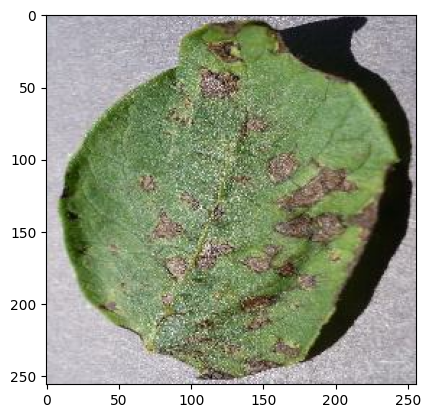

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(2):
  first_image = images_batch[2].numpy().astype('uint8')
  first_label = labels_batch[2].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:", class_names[np.argmax(batch_prediction[2])])
  confidence = np.max(batch_prediction[2])
  print('confidence', confidence)




In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]

  confidence = round(100 *(np.max(predictions[0])),2)
  return predicted_class, confidence



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


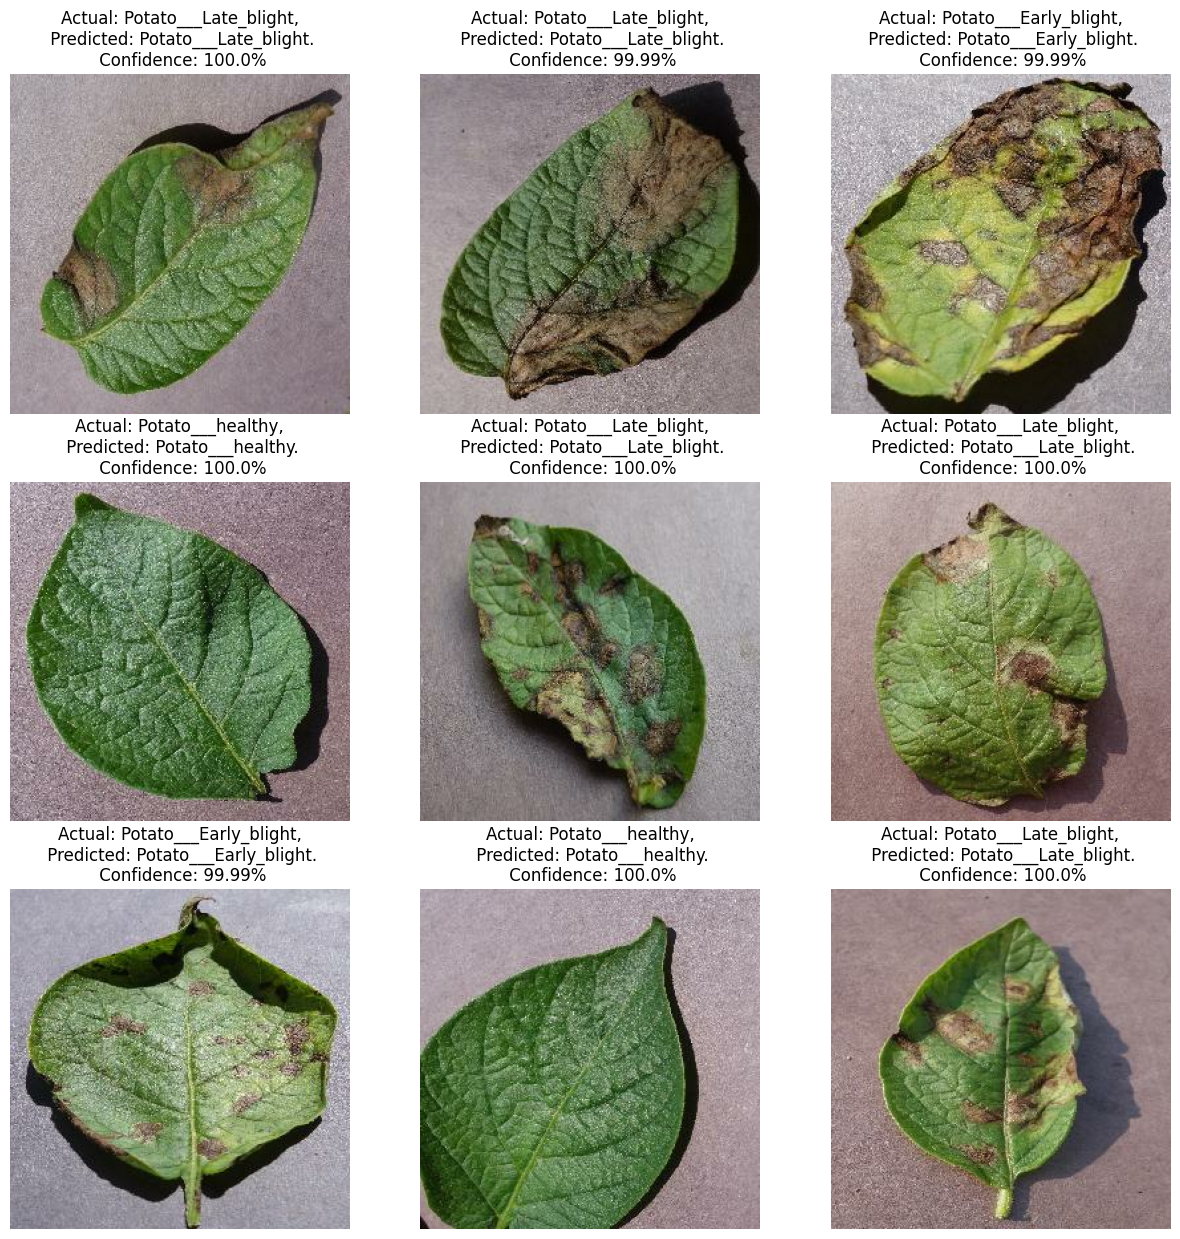

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images[i].numpy())

    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')

In [ ]:
model.save('Potato_disease_model.h5')

In [ ]:
from google.colab import files
files.download("Potato_disease_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>